In [174]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
from sklearn import datasets

# Clustering Problem
    #Problem Statement: To Predict the optimum number of Clusters and represent them visually
    # Data: Iris.csv
        Sepal Length (in cm)
        Sepal Width (in cm)
        Petal Length (in cm)
        Petal Width (in cm)
        Species
    # Modelling: K Mean Clustering
    # Evaluation of the Model

In [175]:
iris = datasets.load_iris()
df = pd.DataFrame(iris["data"], columns = iris["feature_names"])
#iris = pd.read_csv("Iris.csv", index_col="Id")

In [176]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [177]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


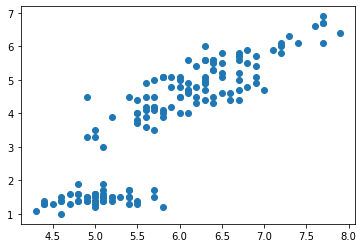

In [178]:
plt.scatter(df["sepal length (cm)"], df["petal length (cm)"]);

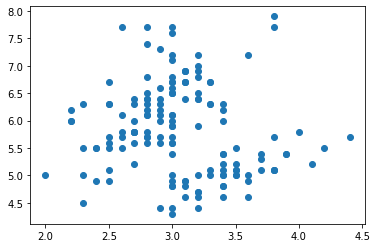

In [179]:
plt.scatter(df["sepal width (cm)"], df["sepal length (cm)"]);

# Modelling

In [180]:
from sklearn.cluster import KMeans

In [181]:
# How many cluster to take
k_range = range(1, 11)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

In [182]:
sse

[681.3706,
 152.3479517603579,
 78.85144142614601,
 57.22847321428571,
 46.44618205128205,
 39.066035353535355,
 34.53097186147186,
 30.015880952380954,
 27.98250773993808,
 25.86780792556257]

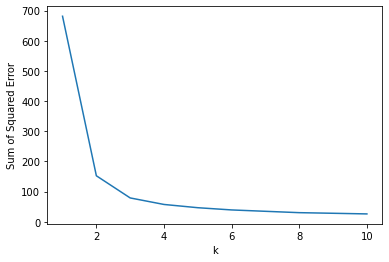

In [183]:
plt.plot(k_range, sse)
plt.xlabel("k")
plt.ylabel("Sum of Squared Error");

We can see that the elbow is at 3. So the number of clusters will be 3

In [184]:
df = df.iloc[:,:].values
km = KMeans(n_clusters=3, random_state=42)
preds = km.fit_predict(df)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [185]:
km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [186]:
df[preds == 0,1]

array([3.2, 3.2, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9,
       2.9, 3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 2.7, 2.5, 2.5, 2.8,
       2.2, 2.8, 2.7, 2.8, 3. , 2.8, 3. , 2.7, 2.5, 3. ])

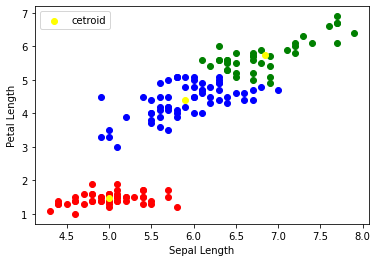

In [187]:
#scatter plot 1
plt.scatter(df[preds == 0,0], df[preds == 0,2], c = "blue")
plt.scatter(df[preds == 1,0], df[preds == 1,2], c = "red")
plt.scatter(df[preds == 2,0], df[preds == 2,2], c = "green")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,2], c = "yellow", label = "cetroid")
plt.legend();

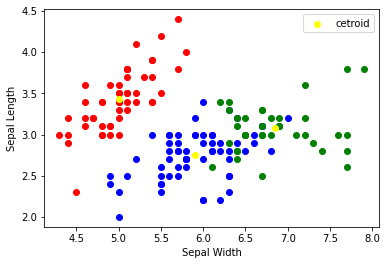

In [188]:
#scatter plot 2
plt.scatter(df[preds == 0,0], df[preds == 0,1], c = "blue")
plt.scatter(df[preds == 1,0], df[preds == 1,1], c = "red")
plt.scatter(df[preds == 2,0], df[preds == 2,1], c = "green")
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c = "yellow", label = "cetroid")
plt.legend();

# Evaluation

In [150]:
km.inertia_

78.85144142614601

In [151]:
km_1 = KMeans(n_clusters=4, random_state=42)
preds_1 = km_1.fit_predict(df)
km_1.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.2525    , 2.855     , 4.815     , 1.625     ],
       [6.9125    , 3.1       , 5.846875  , 2.13125   ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143]])

In [152]:
km_1.inertia_

57.22847321428571

The Inertia measures how well a dataset was clustered by K-Means. A low inertia and low number of of clusters is an indication of goodness of the model. When our number of clusters is 3 and inertia is 78.85 just by increasing the clusters by 1 we can reduce the inertia to 57.22 and improve the goodness of the model